## Final Project Submission

Please fill out:
* Student name: Brian O'Donnell
* Student pace: Flex-Part time
* Scheduled project review date/time: February 
* Instructor name: Abhineet KulKarni
* Blog post URL:


***
***

## Analysis Of Movie Industry Data

#### Author : Brian O'Donnell

***

##  Overview
This presentation was created to successfully assist Microsoft with their transition into the film industry. It was achieved by compiling data from multiple sources and then organizing that information to make it interpretable and to be able to make conclusions from that data. Through looking at the statistics and visuals we will see that there is a general association of higher box office earnings from movies with higher production budgets. There is also a similar correlation which shows that the more theaters the movie is released to, the more likely it is achieve higher earnings. This is aside from movies that fall under the 'Horror' genre, which showed significantly higher ROI's than all the other genres, even though their average ratings and theater releases were below average when compared to movies in other categories. After seeing how this data was acquired and analyzed Microsoft will have some insight as to where to begin their entry into the movie industry while increasing their chances of being financially successful.

***

## Business Problem
The purpose of this presentation is to solve the problem Microsoft has of not knowing where to begin within the movie industry. Every year hundreds of movies are released and the differences between each one is so vast it is hard to know what makes one movie successful while a similar movie is not. Some low-budget independent movie may have an ROI that is much higher than a major studio blockbuster. Or a movie with excellent ratings and reviews has less than expected box office sales while a poorly rated movie rakes in the receipts. The good news is that a multi-billion dollar company like Microsoft has a wide variety of tools and cash flow at their disposal, which this analysis will show is of great benefit, due to the fact that as previously mentioned, higher budgets often lead to higher earnings. To help solve these problem I made a few hypotheses and ran the data accordingly, they were:
    
    -Is there a correlation between a higher budget and higher box officer earnings?
    -Is there a correlation between a higher number of theater showings and higher earnings?
    -Does a particular genre of movie tend to have a better return on investment than the others?
    -Do ratings play a role in how much money a movie will make?
    
I chose these questions since Microsoft will likely have the cash flow to compete with other major studios and their budgets as well afford a higher than average movie theater release. If this analysis was for a smaller studio or independent film group, these are not the questions I would be asking

****

In [2]:
# Importing the needed packages and libraries that are used for working with the data
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import requests

#Configuring numpy to turn off warnings when dealing with floating points and to supress scientific notation
np.seterr(invalid='ignore')
pd.options.display.float_format = '{:.2f}'.format


%matplotlib inline


*****

## Data Understanding

To start the process of understanding the data I am going to start off by importing the necessary data and looking at what information is in the files and what needs to be cleaned or dropped, etc.
I used 3 different sources to obtain the needed movie data.
   1. The IMDB 'Title' database: This page is part of the Internet Movie Data Base site that contains movie identification numbers, titles, release years, run time and genres.
   2. The IMDB 'Ratings' database: This portion of the site contains the same movie identification number, along with the movies average rating and number of votes.
   3. The Numbers: This is a very helpful site that provides multiple categories you can choose from, what I wanted to look at was movie titles, genres, budgets, box office sales, run time, number of theaters the movie was released in and production method. 

While the data on IMDB is open to import and view, the information from 'The Numbers' was acquired by a process knows as web-scraping, which I will touch on later. 



## IMDB Title Info

In [3]:
#Importing the title dataset from IMDB and looking at the first few rows along with their columns.
i_title = pd.read_csv('/Users/natashawyatt/Documents/Flatiron_school/Phase_1/Phase_1_Project/dsc-phase-1-project-v2-3/zippedData/imdb.title.basics.csv.gz')
i_title.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00,"Comedy,Drama,Fantasy"


In [4]:
# Getting a glimpse of some of the data that will be used to make our dataframes.

In [5]:
i_title.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [6]:
#Importing the rating dataset from IMDB and looking at the first few rows along with their columns.
i_ratings = pd.read_csv('/Users/natashawyatt/Documents/Flatiron_school/Phase_1/Phase_1_Project/dsc-phase-1-project-v2-3/zippedData/imdb.title.ratings.csv.gz')
i_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.30,31
1,tt10384606,8.90,559
2,tt1042974,6.40,20
3,tt1043726,4.20,50352
4,tt1060240,6.50,21


In [7]:
# Once again looking at the imported info for the dataframe.
i_ratings.shape

(73856, 3)

In [8]:
i_ratings.nunique()

tconst           73856
averagerating       91
numvotes          7349
dtype: int64

In [9]:
i_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


So after looking at the data for IMDB titles and ratings we can see the columns and rows configuration along with
the type of data it is. It seems like the appropriate columns are either floats or integers, which is good.
We also can see there is a common column/index of 'tconst' which we will try to merge by. This way we can see on 
1 table the movie name and rating that coincides by 'tconst'

In [10]:
# Running the function to merge the sets into 1 dataframe and then taking a look at the columns.
m_ratings= pd.merge(i_ratings, i_title)
m_ratings.columns

Index(['tconst', 'averagerating', 'numvotes', 'primary_title',
       'original_title', 'start_year', 'runtime_minutes', 'genres'],
      dtype='object')

In [11]:
# Quick look at the top 25 rows and columns to make sure everything looks in place.
m_ratings.head(25)

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.30,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.00,Romance
1,tt10384606,8.90,559,Borderless,Borderless,2019,87.00,Documentary
2,tt1042974,6.40,20,Just Inès,Just Inès,2010,90.00,Drama
3,tt1043726,4.20,50352,The Legend of Hercules,The Legend of Hercules,2014,99.00,"Action,Adventure,Fantasy"
4,tt1060240,6.50,21,Até Onde?,Até Onde?,2011,73.00,"Mystery,Thriller"
5,tt1069246,6.20,326,Habana Eva,Habana Eva,2010,106.00,"Comedy,Romance"
6,tt1094666,7.00,1613,The Hammer,Hamill,2010,108.00,"Biography,Drama,Sport"
7,tt1130982,6.40,571,The Night Clerk,Avant l'aube,2011,104.00,"Drama,Thriller"
8,tt1156528,7.20,265,Silent Sonata,Circus Fantasticus,2011,77.00,"Drama,War"
9,tt1161457,4.20,148,Vanquisher,The Vanquisher,2016,90.00,"Action,Adventure,Sci-Fi"


In [12]:
m_ratings.shape

(73856, 8)

In [13]:
# Taking a look at some descriptive stats here, mainly the average number of votes/rating per movie and average run time.
# This info will be used later when looking for correlations
m_ratings.describe()

,averagerating,numvotes,start_year,runtime_minutes
count,73856.00,73856.00,73856.00,66236.00
mean,6.33,3523.66,2014.28,94.65
std,1.47,30294.02,2.61,208.57
min,1.00,5.00,2010.00,3.00
25%,5.50,14.00,2012.00,81.00
50%,6.50,49.00,2014.00,91.00
75%,7.40,282.00,2016.00,104.00
max,10.00,1841066.00,2019.00,51420.00


### Web-Scraping Data From The Numbers

Going to The Numbers website I created a table of the top 100 movies in terms of world wide box office earnings and returned them with the selected categories needed to complete my analysis. I started with the year 2019, deciding the pandemic of 2020 may cause too many outliers. Once this was done I used the web-scraping function to be able to import and work with data pulled from the website. I'll elaborate more as I go through the process.

In [14]:
import requests 
from bs4 import BeautifulSoup

In [15]:
# The Numbers website has a feature that allows you to generate reports based on selected categories.
# I generated a report for: release date, title, genre, production method, creative type, budget, theaters and income.
# Scraping this site also eliminates the need to drop rows after importing from other data since it has this option to select categories.
# This is the url with the data that will be scraped, I started with the year 2019 thinking the COVID pandemic would cause
# to many outlier issues with 2020 data:
url = "https://www.the-numbers.com/movies/report/All/All/All/All/All/All/All/All/All/None/None/2019/2019/None/None/None/None/None/None?show-release-date=On&view-order-by=worldwide-box-office&view-order-direction=desc&show-production-budget=On&show-domestic-box-office=On&show-maximum-theaters=On&show-international-box-office=On&show-worldwide-box-office=On&show-genre=On&show-production-method=On&show-creative-type=On"
#This request function allows you to access the content
response = requests.get(url)
# And this BeautifulSoup function allows to actually DO someting with it
soup = BeautifulSoup(response.text, 'lxml')
# Pulling the <table> from source page that has the report with selected categories mentioned earlier
table = soup.find('table')
# converting html into a string to be able to work with it and then into a visual dataframe.
table_string_df = pd.read_html(str(table))[0]
table_string_df.head(50)

,Unnamed: 0,Released,Title,Genre,ProductionMethod,CreativeType,ProductionBudget,MaximumTheaters,DomesticBox Office,InternationalBox Office,WorldwideBox Office
0,1,"Apr 26, 2019",Avengers: Endgame,Action,Animation/Live Action,Super Hero,"$400,000,000",4662,"$858,373,000","$1,939,427,564","$2,797,800,564"
1,2,"Jul 19, 2019",The Lion King,Adventure,Animation/Live Action,Kids Fiction,"$260,000,000",4802,"$543,638,043","$1,110,729,382","$1,654,367,425"
2,3,"Nov 22, 2019",Frozen II,Adventure,Digital Animation,Kids Fiction,"$150,000,000",4440,"$477,373,578","$967,808,702","$1,445,182,280"
3,4,"Jul 2, 2019",Spider-Man: Far From Home,Action,Live Action,Super Hero,"$160,000,000",4634,"$390,532,085","$742,000,747","$1,132,532,832"
4,5,"Mar 8, 2019",Captain Marvel,Action,Animation/Live Action,Super Hero,"$175,000,000",4310,"$426,829,839","$702,897,549","$1,129,727,388"
5,6,"Jun 21, 2019",Toy Story 4,Adventure,Digital Animation,Kids Fiction,"$200,000,000",4575,"$434,038,008","$639,042,321","$1,073,080,329"
6,7,"Dec 20, 2019",Star Wars: The Rise of Skywalker,Adventure,Animation/Live Action,Science Fiction,"$275,000,000",4406,"$515,202,542","$557,645,945","$1,072,848,487"
7,8,"Oct 4, 2019",Joker,Thriller/Suspense,Live Action,Contemporary Fiction,"$55,000,000",4374,"$335,451,311","$737,056,206","$1,072,507,517"
8,9,"May 24, 2019",Aladdin,Adventure,Animation/Live Action,Fantasy,"$182,000,000",4476,"$355,559,216","$691,090,490","$1,046,649,706"
9,10,"Dec 13, 2019",Jumanji: The Next Level,Adventure,Live Action,Science Fiction,"$125,000,000",4227,"$316,831,246","$481,501,654","$798,332,900"


In [16]:
# Checking to make sure the needed columns are present and they are of the proper data type. 
# The numerical columns need to be intergers or floats to be able to manipulate them.
table_string_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               100 non-null    int64 
 1   Released                 100 non-null    object
 2   Title                    100 non-null    object
 3   Genre                    100 non-null    object
 4   ProductionMethod         99 non-null     object
 5   CreativeType             98 non-null     object
 6   ProductionBudget         100 non-null    object
 7   MaximumTheaters          100 non-null    int64 
 8   DomesticBox Office       100 non-null    object
 9   InternationalBox Office  100 non-null    object
 10  WorldwideBox Office      100 non-null    object
dtypes: int64(2), object(9)
memory usage: 8.7+ KB


In [17]:
# Looking to see how many genres there are and the number of movies for each one.
table_string_df.Genre.value_counts()

Drama                25
Adventure            24
Action               22
Thriller/Suspense     9
Horror                8
Comedy                6
Romantic Comedy       3
Black Comedy          2
Musical               1
Name: Genre, dtype: int64

In [18]:
# Getting the number of production methods.
table_string_df.ProductionMethod.value_counts()

Live Action                    70
Digital Animation              16
Animation/Live Action          12
Multiple Production Methods     1
Name: ProductionMethod, dtype: int64

In [19]:
# Something that needs to be done is removing the '$' from columns to be able to use them as an integers
table_string_df[table_string_df.columns[6:]] = table_string_df[table_string_df.columns[6:]].replace('[\$,]', '',regex=True).astype(int)
table_string_df[table_string_df.columns[8:]] = table_string_df[table_string_df.columns[8:]].replace('[\$,]', '',regex=True).astype(int)
table_string_df[table_string_df.columns[9:]] = table_string_df[table_string_df.columns[9:]].replace('[\$,]', '',regex=True).astype(int)
table_string_df[table_string_df.columns[10:]] = table_string_df[table_string_df.columns[10:]].replace('[\$,]', '',regex=True).astype(int)
# Looking at the first 10 rows to make sure that the '$' has been properly dropped.
table_string_df.head(10)

,Unnamed: 0,Released,Title,Genre,ProductionMethod,CreativeType,ProductionBudget,MaximumTheaters,DomesticBox Office,InternationalBox Office,WorldwideBox Office
0,1,"Apr 26, 2019",Avengers: Endgame,Action,Animation/Live Action,Super Hero,400000000,4662,858373000,1939427564,2797800564
1,2,"Jul 19, 2019",The Lion King,Adventure,Animation/Live Action,Kids Fiction,260000000,4802,543638043,1110729382,1654367425
2,3,"Nov 22, 2019",Frozen II,Adventure,Digital Animation,Kids Fiction,150000000,4440,477373578,967808702,1445182280
3,4,"Jul 2, 2019",Spider-Man: Far From Home,Action,Live Action,Super Hero,160000000,4634,390532085,742000747,1132532832
4,5,"Mar 8, 2019",Captain Marvel,Action,Animation/Live Action,Super Hero,175000000,4310,426829839,702897549,1129727388
5,6,"Jun 21, 2019",Toy Story 4,Adventure,Digital Animation,Kids Fiction,200000000,4575,434038008,639042321,1073080329
6,7,"Dec 20, 2019",Star Wars: The Rise of Skywalker,Adventure,Animation/Live Action,Science Fiction,275000000,4406,515202542,557645945,1072848487
7,8,"Oct 4, 2019",Joker,Thriller/Suspense,Live Action,Contemporary Fiction,55000000,4374,335451311,737056206,1072507517
8,9,"May 24, 2019",Aladdin,Adventure,Animation/Live Action,Fantasy,182000000,4476,355559216,691090490,1046649706
9,10,"Dec 13, 2019",Jumanji: The Next Level,Adventure,Live Action,Science Fiction,125000000,4227,316831246,481501654,798332900


***

We see the that the web-scraping function worked well. I'd like to add an extra 5 years of data to work with, luckily we can simply use the same exact code and just change the years, then we will put all of it together.

***

In [20]:
# This is the url with that data that will be scraped, now for the year 2018:
url = "https://www.the-numbers.com/movies/report/All/All/All/All/All/All/All/All/All/None/None/2018/2018/None/None/None/None/None/None?show-release-date=On&view-order-by=worldwide-box-office&view-order-direction=desc&show-production-budget=On&show-domestic-box-office=On&show-maximum-theaters=On&show-international-box-office=On&show-worldwide-box-office=On&show-genre=On&show-production-method=On&show-creative-type=On"
#This allows to access the content
response = requests.get(url)
# And this BeautifulSoup function allows to actually DO someting with it
soup = BeautifulSoup(response.text, 'lxml')
# Pulling the <table> from source page that has the report with selected categories mentioned earlier
table = soup.find('table')
# converting html into a string to be able to work with it and then into a visual dataframe.
table_2018 = pd.read_html(str(table))[0]
table_2018.head()

,Unnamed: 0,Released,Title,Genre,ProductionMethod,CreativeType,ProductionBudget,MaximumTheaters,DomesticBox Office,InternationalBox Office,WorldwideBox Office
0,1,"Apr 27, 2018",Avengers: Infinity War,Action,Animation/Live Action,Super Hero,"$300,000,000",4474,"$678,815,482","$1,369,544,272","$2,048,359,754"
1,2,"Feb 16, 2018",Black Panther,Action,Live Action,Super Hero,"$200,000,000",4084,"$700,059,566","$636,434,755","$1,336,494,321"
2,3,"Jun 22, 2018",Jurassic World: Fallen Kingdom,Action,Live Action,Science Fiction,"$170,000,000",4485,"$417,719,760","$890,614,245","$1,308,334,005"
3,4,"Jun 15, 2018",Incredibles 2,Adventure,Digital Animation,Kids Fiction,"$200,000,000",4413,"$608,581,744","$634,223,615","$1,242,805,359"
4,5,"Dec 21, 2018",Aquaman,Action,Animation/Live Action,Super Hero,"$160,000,000",4184,"$335,061,807","$808,696,893","$1,143,758,700"


In [21]:
# This is the url with that data that will be scraped, now for the year 2017:
url = "https://www.the-numbers.com/movies/report/All/All/All/All/All/All/All/All/All/None/None/2017/2017/None/None/None/None/None/None?show-release-date=On&view-order-by=worldwide-box-office&view-order-direction=desc&show-production-budget=On&show-domestic-box-office=On&show-maximum-theaters=On&show-international-box-office=On&show-worldwide-box-office=On&show-genre=On&show-production-method=On&show-creative-type=On"
#This allows to access the content
response = requests.get(url)
# And this BeautifulSoup function allows to actually DO someting with it
soup = BeautifulSoup(response.text, 'lxml')
# Pulling the <table> from source page that has the report with selected categories mentioned earlier
table = soup.find('table')
# converting html into a string to be able to work with it and then into a visual dataframe.
table_2017 = pd.read_html(str(table))[0]
table_2017.head()

,Unnamed: 0,Released,Title,Genre,ProductionMethod,CreativeType,ProductionBudget,MaximumTheaters,DomesticBox Office,InternationalBox Office,WorldwideBox Office
0,1,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,Adventure,Animation/Live Action,Science Fiction,"$262,000,000",4232,"$620,181,382","$711,453,759","$1,331,635,141"
1,2,"Mar 17, 2017",Beauty and the Beast,Musical,Animation/Live Action,Fantasy,"$160,000,000",4210,"$504,014,165","$769,095,055","$1,273,109,220"
2,3,"Apr 14, 2017",The Fate of the Furious,Action,Live Action,Contemporary Fiction,"$250,000,000",4329,"$225,764,765","$1,010,939,031","$1,236,703,796"
3,4,"Jun 30, 2017",Despicable Me 3,Adventure,Digital Animation,Kids Fiction,"$75,000,000",4535,"$264,624,300","$767,972,594","$1,032,596,894"
4,5,"Dec 20, 2017",Jumanji: Welcome to the Jungle,Adventure,Live Action,Science Fiction,"$90,000,000",3849,"$404,508,916","$557,104,283","$961,613,199"


In [22]:
# This is the url with that data that will be scraped, now for the year 2016:
url = "https://www.the-numbers.com/movies/report/All/All/All/All/All/All/All/All/All/None/None/2016/2016/None/None/None/None/None/None?show-release-date=On&view-order-by=worldwide-box-office&view-order-direction=desc&show-production-budget=On&show-domestic-box-office=On&show-maximum-theaters=On&show-international-box-office=On&show-worldwide-box-office=On&show-genre=On&show-production-method=On&show-creative-type=On"
#This allows to access the content
response = requests.get(url)
# And this BeautifulSoup function allows to actually DO someting with it
soup = BeautifulSoup(response.text, 'lxml')
# Pulling the <table> from source page that has the report with selected categories mentioned earlier
table = soup.find('table')
# converting html into a string to be able to work with it and then into a visual dataframe.
table_2016 = pd.read_html(str(table))[0]
table_2016.head()

,Unnamed: 0,Released,Title,Genre,ProductionMethod,CreativeType,ProductionBudget,MaximumTheaters,DomesticBox Office,InternationalBox Office,WorldwideBox Office
0,1,"May 6, 2016",Captain America: Civil War,Action,Live Action,Super Hero,"$250,000,000",4226,"$408,084,349","$743,834,172","$1,151,918,521"
1,2,"Dec 16, 2016",Rogue One: A Star Wars Story,Adventure,Animation/Live Action,Science Fiction,"$200,000,000",4157,"$532,177,324","$522,958,274","$1,055,135,598"
2,3,"Jun 17, 2016",Finding Dory,Adventure,Digital Animation,Kids Fiction,"$200,000,000",4305,"$486,295,561","$538,710,564","$1,025,006,125"
3,4,"Mar 4, 2016",Zootopia,Adventure,Digital Animation,Kids Fiction,"$150,000,000",3959,"$341,268,248","$663,361,687","$1,004,629,935"
4,5,"Apr 15, 2016",The Jungle Book,Adventure,Animation/Live Action,Fantasy,"$175,000,000",4144,"$364,001,123","$589,553,295","$953,554,418"


In [23]:
# This is the url with that data that will be scraped, now for the year 2015:
url = "https://www.the-numbers.com/movies/report/All/All/All/All/All/All/All/All/All/None/None/2015/2015/None/None/None/None/None/None?show-release-date=On&view-order-by=worldwide-box-office&view-order-direction=desc&show-production-budget=On&show-domestic-box-office=On&show-maximum-theaters=On&show-international-box-office=On&show-worldwide-box-office=On&show-genre=On&show-production-method=On&show-creative-type=On"
#This allows to access the content
response = requests.get(url)
# And this BeautifulSoup function allows to actually DO someting with it
soup = BeautifulSoup(response.text, 'lxml')
# Pulling the <table> from source page that has the report with selected categories mentioned earlier
table = soup.find('table')
# converting html into a string to be able to work with it and then into a visual dataframe.
table_2015 = pd.read_html(str(table))[0]
table_2015.head()

,Unnamed: 0,Released,Title,Genre,ProductionMethod,CreativeType,ProductionBudget,MaximumTheaters,DomesticBox Office,InternationalBox Office,WorldwideBox Office
0,1,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,Adventure,Animation/Live Action,Science Fiction,"$306,000,000",4134,"$936,662,225","$1,127,953,592","$2,064,615,817"
1,2,"Jun 12, 2015",Jurassic World,Action,Live Action,Science Fiction,"$215,000,000",4291,"$652,306,625","$1,017,673,342","$1,669,979,967"
2,3,"Apr 3, 2015",Furious 7,Action,Live Action,Contemporary Fiction,"$190,000,000",4022,"$353,007,020","$1,163,874,506","$1,516,881,526"
3,4,"May 1, 2015",Avengers: Age of Ultron,Action,Animation/Live Action,Super Hero,"$365,000,000",4276,"$459,005,868","$936,311,111","$1,395,316,979"
4,5,"Jul 10, 2015",Minions,Adventure,Digital Animation,Kids Fiction,"$74,000,000",4311,"$336,045,770","$823,585,370","$1,159,631,140"


In [24]:
# This is the url with that data that will be scraped, now for the year 2014:
url = "https://www.the-numbers.com/movies/report/All/All/All/All/All/All/All/All/All/None/None/2014/2014/None/None/None/None/None/None?show-release-date=On&view-order-by=worldwide-box-office&view-order-direction=desc&show-production-budget=On&show-domestic-box-office=On&show-maximum-theaters=On&show-international-box-office=On&show-worldwide-box-office=On&show-genre=On&show-production-method=On&show-creative-type=On"
#This allows to access the content
response = requests.get(url)
# And this BeautifulSoup function allows to actually DO someting with it
soup = BeautifulSoup(response.text, 'lxml')
# Pulling the <table> from source page that has the report with selected categories mentioned earlier
table = soup.find('table')
# converting html into a string to be able to work with it and then into a visual dataframe.
table_2014 = pd.read_html(str(table))[0]
table_2014.head()

,Unnamed: 0,Released,Title,Genre,ProductionMethod,CreativeType,ProductionBudget,MaximumTheaters,DomesticBox Office,InternationalBox Office,WorldwideBox Office
0,1,"Jun 27, 2014",Transformers: Age of Extinction,Action,Animation/Live Action,Science Fiction,"$210,000,000",4233,"$245,439,076","$858,614,996","$1,104,054,072"
1,2,"Dec 17, 2014",The Hobbit: The Battle of the Five Ar…,Adventure,Animation/Live Action,Fantasy,"$250,000,000",3875,"$255,119,788","$685,269,770","$940,389,558"
2,3,"Aug 1, 2014",Guardians of the Galaxy,Action,Animation/Live Action,Super Hero,"$170,000,000",4088,"$333,714,112","$437,168,283","$770,882,395"
3,4,"Nov 21, 2014",The Hunger Games: Mockingjay - Part 1,Thriller/Suspense,Live Action,Science Fiction,"$125,000,000",4151,"$337,135,885","$429,439,246","$766,575,131"
4,5,"May 30, 2014",Maleficent,Adventure,Live Action,Fantasy,"$180,000,000",3948,"$241,407,328","$517,129,407","$758,536,735"


## Data Preperation

Now that we have all the data imported its time to 'clean' it up. This means doing things such as adding or dropping columns as needed or fixing missing data. 

In [25]:
# Running a function to clean the data, dropping the $ to be able to work with the integers as before.
# This function then can be ran with each year we pulled from web-scraping instead of hard coding it each time.

def drop(df):
    
    df[df.columns[6:]] = df[df.columns[6:]].replace('[\$,]', '',regex=True).astype(int)
    df[df.columns[8:]] = df[df.columns[8:]].replace('[\$,]', '',regex=True).astype(int)
    df[df.columns[9:]] = df[df.columns[9:]].replace('[\$,]', '',regex=True).astype(int)
    df[df.columns[10:]] = df[df.columns[10:]].replace('[\$,]', '',regex=True).astype(int)
    return df

In [26]:
# Running the function.
table_2014 = drop(table_2014)
# Looking at the first few rows to make sure it worked.
table_2014.head()

,Unnamed: 0,Released,Title,Genre,ProductionMethod,CreativeType,ProductionBudget,MaximumTheaters,DomesticBox Office,InternationalBox Office,WorldwideBox Office
0,1,"Jun 27, 2014",Transformers: Age of Extinction,Action,Animation/Live Action,Science Fiction,210000000,4233,245439076,858614996,1104054072
1,2,"Dec 17, 2014",The Hobbit: The Battle of the Five Ar…,Adventure,Animation/Live Action,Fantasy,250000000,3875,255119788,685269770,940389558
2,3,"Aug 1, 2014",Guardians of the Galaxy,Action,Animation/Live Action,Super Hero,170000000,4088,333714112,437168283,770882395
3,4,"Nov 21, 2014",The Hunger Games: Mockingjay - Part 1,Thriller/Suspense,Live Action,Science Fiction,125000000,4151,337135885,429439246,766575131
4,5,"May 30, 2014",Maleficent,Adventure,Live Action,Fantasy,180000000,3948,241407328,517129407,758536735


In [27]:
table_2015 = drop(table_2015)
table_2015.head()

,Unnamed: 0,Released,Title,Genre,ProductionMethod,CreativeType,ProductionBudget,MaximumTheaters,DomesticBox Office,InternationalBox Office,WorldwideBox Office
0,1,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,Adventure,Animation/Live Action,Science Fiction,306000000,4134,936662225,1127953592,2064615817
1,2,"Jun 12, 2015",Jurassic World,Action,Live Action,Science Fiction,215000000,4291,652306625,1017673342,1669979967
2,3,"Apr 3, 2015",Furious 7,Action,Live Action,Contemporary Fiction,190000000,4022,353007020,1163874506,1516881526
3,4,"May 1, 2015",Avengers: Age of Ultron,Action,Animation/Live Action,Super Hero,365000000,4276,459005868,936311111,1395316979
4,5,"Jul 10, 2015",Minions,Adventure,Digital Animation,Kids Fiction,74000000,4311,336045770,823585370,1159631140


In [28]:
table_2016 = drop(table_2016)
table_2016.head()

,Unnamed: 0,Released,Title,Genre,ProductionMethod,CreativeType,ProductionBudget,MaximumTheaters,DomesticBox Office,InternationalBox Office,WorldwideBox Office
0,1,"May 6, 2016",Captain America: Civil War,Action,Live Action,Super Hero,250000000,4226,408084349,743834172,1151918521
1,2,"Dec 16, 2016",Rogue One: A Star Wars Story,Adventure,Animation/Live Action,Science Fiction,200000000,4157,532177324,522958274,1055135598
2,3,"Jun 17, 2016",Finding Dory,Adventure,Digital Animation,Kids Fiction,200000000,4305,486295561,538710564,1025006125
3,4,"Mar 4, 2016",Zootopia,Adventure,Digital Animation,Kids Fiction,150000000,3959,341268248,663361687,1004629935
4,5,"Apr 15, 2016",The Jungle Book,Adventure,Animation/Live Action,Fantasy,175000000,4144,364001123,589553295,953554418


In [29]:
table_2017 = drop(table_2017)
table_2017.head()

,Unnamed: 0,Released,Title,Genre,ProductionMethod,CreativeType,ProductionBudget,MaximumTheaters,DomesticBox Office,InternationalBox Office,WorldwideBox Office
0,1,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,Adventure,Animation/Live Action,Science Fiction,262000000,4232,620181382,711453759,1331635141
1,2,"Mar 17, 2017",Beauty and the Beast,Musical,Animation/Live Action,Fantasy,160000000,4210,504014165,769095055,1273109220
2,3,"Apr 14, 2017",The Fate of the Furious,Action,Live Action,Contemporary Fiction,250000000,4329,225764765,1010939031,1236703796
3,4,"Jun 30, 2017",Despicable Me 3,Adventure,Digital Animation,Kids Fiction,75000000,4535,264624300,767972594,1032596894
4,5,"Dec 20, 2017",Jumanji: Welcome to the Jungle,Adventure,Live Action,Science Fiction,90000000,3849,404508916,557104283,961613199


In [30]:
table_2018 = drop(table_2018)
table_2018.head()

,Unnamed: 0,Released,Title,Genre,ProductionMethod,CreativeType,ProductionBudget,MaximumTheaters,DomesticBox Office,InternationalBox Office,WorldwideBox Office
0,1,"Apr 27, 2018",Avengers: Infinity War,Action,Animation/Live Action,Super Hero,300000000,4474,678815482,1369544272,2048359754
1,2,"Feb 16, 2018",Black Panther,Action,Live Action,Super Hero,200000000,4084,700059566,636434755,1336494321
2,3,"Jun 22, 2018",Jurassic World: Fallen Kingdom,Action,Live Action,Science Fiction,170000000,4485,417719760,890614245,1308334005
3,4,"Jun 15, 2018",Incredibles 2,Adventure,Digital Animation,Kids Fiction,200000000,4413,608581744,634223615,1242805359
4,5,"Dec 21, 2018",Aquaman,Action,Animation/Live Action,Super Hero,160000000,4184,335061807,808696893,1143758700


In [31]:
# Concating all the tables from the web-scraping to create one dataframe.
to_concat = [table_string_df, table_2018, table_2017, table_2016, table_2015, table_2014]
Total_numbers = pd.concat(to_concat)
# Looking at the first few rows.
Total_numbers.head()

,Unnamed: 0,Released,Title,Genre,ProductionMethod,CreativeType,ProductionBudget,MaximumTheaters,DomesticBox Office,InternationalBox Office,WorldwideBox Office
0,1,"Apr 26, 2019",Avengers: Endgame,Action,Animation/Live Action,Super Hero,400000000,4662,858373000,1939427564,2797800564
1,2,"Jul 19, 2019",The Lion King,Adventure,Animation/Live Action,Kids Fiction,260000000,4802,543638043,1110729382,1654367425
2,3,"Nov 22, 2019",Frozen II,Adventure,Digital Animation,Kids Fiction,150000000,4440,477373578,967808702,1445182280
3,4,"Jul 2, 2019",Spider-Man: Far From Home,Action,Live Action,Super Hero,160000000,4634,390532085,742000747,1132532832
4,5,"Mar 8, 2019",Captain Marvel,Action,Animation/Live Action,Super Hero,175000000,4310,426829839,702897549,1129727388


In [32]:
# Now attempting to merge the early table we made from IMDB with the table we just created from web-scraping.
All_data = pd.merge(m_ratings, Total_numbers, how='inner', left_on=['primary_title'], right_on=['Title'])
All_data


,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,Unnamed: 0,Released,Title,Genre,ProductionMethod,CreativeType,ProductionBudget,MaximumTheaters,DomesticBox Office,InternationalBox Office,WorldwideBox Office
0,tt1663202,8.00,621193,The Revenant,The Revenant,2015,156.00,"Action,Adventure,Biography",13,"Dec 25, 2015",The Revenant,Adventure,Live Action,Dramatization,135000000,3711,183637894,349300408,532938302
1,tt3300078,6.00,20,The Revenant,The Revenant,2012,80.00,Horror,13,"Dec 25, 2015",The Revenant,Adventure,Live Action,Dramatization,135000000,3711,183637894,349300408,532938302
2,tt10075374,8.30,6,The Little Prince,The Little Prince,2019,93.00,Action,85,"Feb 12, 2016",The Little Prince,Adventure,Digital Animation,Kids Fiction,77500000,163,1311213,100717706,102028919
3,tt5317732,7.80,6,The Little Prince,The Little Prince,2015,NaN,Documentary,85,"Feb 12, 2016",The Little Prince,Adventure,Digital Animation,Kids Fiction,77500000,163,1311213,100717706,102028919
4,tt1754656,7.70,50015,The Little Prince,Le Petit Prince,2015,108.00,"Adventure,Animation,Drama",85,"Feb 12, 2016",The Little Prince,Adventure,Digital Animation,Kids Fiction,77500000,163,1311213,100717706,102028919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,tt1981128,5.30,78287,Geostorm,Geostorm,2017,109.00,"Action,Sci-Fi,Thriller",46,"Oct 20, 2017",Geostorm,Thriller/Suspense,Live Action,Science Fiction,100000000,3246,33700160,187095849,220796009
490,tt1987680,6.70,24169,The Upside,The Upside,2017,126.00,"Comedy,Drama",62,"Jan 11, 2019",The Upside,Comedy,Live Action,Dramatization,37500000,3568,108235497,17582943,125818440
491,tt2333784,6.10,156432,The Expendables 3,The Expendables 3,2014,126.00,"Action,Adventure,Thriller",40,"Aug 15, 2014",The Expendables 3,Action,Live Action,Contemporary Fiction,100000000,3221,39322544,170138834,209461378
492,tt2592614,5.60,74979,Resident Evil: The Final Chapter,Resident Evil: The Final Chapter,2016,107.00,"Action,Horror,Sci-Fi",31,"Jan 27, 2017",Resident Evil: The Final Chapter,Horror,Live Action,Science Fiction,40000000,3104,26844692,287256498,314101190


So far the table is looking pretty good, the merges worked, but we still have to take a closer look to see what else needs to be cleaned.

In [33]:
# Looking at the info we see a few null items that need to be addresses, but overall pretty good.
All_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 494 entries, 0 to 493
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tconst                   494 non-null    object 
 1   averagerating            494 non-null    float64
 2   numvotes                 494 non-null    int64  
 3   primary_title            494 non-null    object 
 4   original_title           494 non-null    object 
 5   start_year               494 non-null    int64  
 6   runtime_minutes          482 non-null    float64
 7   genres                   491 non-null    object 
 8   Unnamed: 0               494 non-null    int64  
 9   Released                 494 non-null    object 
 10  Title                    494 non-null    object 
 11  Genre                    494 non-null    object 
 12  ProductionMethod         494 non-null    object 
 13  CreativeType             494 non-null    object 
 14  ProductionBudget         4

In [34]:
#Looking to clean up some more, looking where I have missing data
All_data.isna().sum()

tconst                      0
averagerating               0
numvotes                    0
primary_title               0
original_title              0
start_year                  0
runtime_minutes            12
genres                      3
Unnamed: 0                  0
Released                    0
Title                       0
Genre                       0
ProductionMethod            0
CreativeType                0
ProductionBudget            0
MaximumTheaters             0
DomesticBox Office          0
InternationalBox Office     0
WorldwideBox Office         0
dtype: int64

In [35]:
# Taking a look to see exactly what movie rows have missing run times.
All_data.loc[All_data['runtime_minutes'].isnull()]

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,Unnamed: 0,Released,Title,Genre,ProductionMethod,CreativeType,ProductionBudget,MaximumTheaters,DomesticBox Office,InternationalBox Office,WorldwideBox Office
3,tt5317732,7.80,6,The Little Prince,The Little Prince,2015,NaN,Documentary,85,"Feb 12, 2016",The Little Prince,Adventure,Digital Animation,Kids Fiction,77500000,163,1311213,100717706,102028919
9,tt1085448,6.60,10,Lights Out,Lights Out,2010,NaN,Drama,61,"Jul 22, 2016",Lights Out,Horror,Live Action,Contemporary Fiction,5000000,2835,67268835,81537675,148806510
11,tt2611518,8.60,22,Lights Out,Lights Out,2013,NaN,Drama,61,"Jul 22, 2016",Lights Out,Horror,Live Action,Contemporary Fiction,5000000,2835,67268835,81537675,148806510
33,tt1091821,5.60,223,Noah,Noah,2012,NaN,Animation,23,"Mar 28, 2014",Noah,Drama,Live Action,Historical Fiction,130000000,3571,101200044,251631021,352831065
47,tt6858500,7.60,5,Robin Hood,Robin Hood,2018,NaN,NaN,90,"Nov 21, 2018",Robin Hood,Action,Live Action,Historical Fiction,99000000,2939,30824628,54385384,85210012
61,tt9851050,4.70,14,Sisters,Sisters,2019,NaN,"Action,Drama",67,"Dec 18, 2015",Sisters,Comedy,Live Action,Contemporary Fiction,30000000,2978,87044645,18986015,106030660
107,tt3604256,6.80,5,Split,Split,2016,NaN,Crime,37,"Jan 20, 2017",Split,Horror,Live Action,Contemporary Fiction,9000000,3373,138141585,140613009,278754594
116,tt2201083,2.60,167,Into the Woods,Into the Woods,2012,NaN,Thriller,38,"Dec 25, 2014",Into the Woods,Musical,Animation/Live Action,Fantasy,56200000,2833,128002372,84548204,212550576
118,tt2191715,7.80,33,Into the Woods,Into the Woods,2011,NaN,"Comedy,Musical",38,"Dec 25, 2014",Into the Woods,Musical,Animation/Live Action,Fantasy,56200000,2833,128002372,84548204,212550576
145,tt3472798,7.60,11,Playing with Fire,Paizontas me ti fotia,2014,NaN,Documentary,100,"Nov 8, 2019",Playing with Fire,Comedy,Live Action,Contemporary Fiction,0,3125,44451847,16797656,61249503


In [36]:
# Since only 12 out of almost 500 of these rows is null(approx 2%), Im going to fill with the median run time.

All_data['runtime_minutes'] = All_data['runtime_minutes'].fillna(value=All_data['runtime_minutes'].median)

In [37]:
# Ok run time is taken care of, now only 3 movie genres that are missing.
All_data.isna().sum()

tconst                     0
averagerating              0
numvotes                   0
primary_title              0
original_title             0
start_year                 0
runtime_minutes            0
genres                     3
Unnamed: 0                 0
Released                   0
Title                      0
Genre                      0
ProductionMethod           0
CreativeType               0
ProductionBudget           0
MaximumTheaters            0
DomesticBox Office         0
InternationalBox Office    0
WorldwideBox Office        0
dtype: int64

In [38]:
# So here I am seeing the null is in the 'genres' column, while the column 'Genre' has the correct info. 
# I planned on dropping certain rows and this is one of them, so that should take care of that missing data.
All_data.loc[All_data['genres'].isnull()]

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,Unnamed: 0,Released,Title,Genre,ProductionMethod,CreativeType,ProductionBudget,MaximumTheaters,DomesticBox Office,InternationalBox Office,WorldwideBox Office
47,tt6858500,7.60,5,Robin Hood,Robin Hood,2018,<bound method NDFrame._add_numeric_operations....,NaN,90,"Nov 21, 2018",Robin Hood,Action,Live Action,Historical Fiction,99000000,2939,30824628,54385384,85210012
94,tt1636456,5.50,22,The Intern,El pasante,2010,65.00,NaN,41,"Sep 25, 2015",The Intern,Comedy,Live Action,Contemporary Fiction,40000000,3320,75764672,121351038,197115710
186,tt2495188,5.80,28,Joy,Hara,2012,80.00,NaN,71,"Dec 25, 2015",Joy,Drama,Live Action,Dramatization,60000000,2924,56451232,44682827,101134059


***

 One last cleaning function I would like to do is drop some columns that aren't needed.
 For example there is a 'Genre' and 'genres' column, I want to drop the 'genres' column since
 its redundant and has some missing values. 
 Ill keep the world wide box office since its the total, but drop domestic/International.
 Also being dropped is primary/original title and 'unnamed'.

***

In [39]:
# Here we are dropping the discussed columns.
All_data.drop(['genres', 'DomesticBox Office', 'InternationalBox Office', 'Unnamed: 0', 'primary_title', 'original_title'], axis=1, inplace=True)


***

So I dropped some columns that were not needed, but now I want to add one, ROI.
I feel this is a very important aspect that can be used when trying to decide if the movie is successful or not. Granted, box office sales will be used as well, the ROI column can be helpful at times.
For creating the ROI column I will simply be dividing the difference of the box office numbers minus the budget.

***

In [40]:
All_data['ROI'] = ((All_data['WorldwideBox Office']-All_data['ProductionBudget'])
                  /All_data['ProductionBudget'])

All_data.head(50)

,tconst,averagerating,numvotes,start_year,runtime_minutes,Released,Title,Genre,ProductionMethod,CreativeType,ProductionBudget,MaximumTheaters,WorldwideBox Office,ROI
0,tt1663202,8.00,621193,2015,156.00,"Dec 25, 2015",The Revenant,Adventure,Live Action,Dramatization,135000000,3711,532938302,2.95
1,tt3300078,6.00,20,2012,80.00,"Dec 25, 2015",The Revenant,Adventure,Live Action,Dramatization,135000000,3711,532938302,2.95
2,tt10075374,8.30,6,2019,93.00,"Feb 12, 2016",The Little Prince,Adventure,Digital Animation,Kids Fiction,77500000,163,102028919,0.32
3,tt5317732,7.80,6,2015,<bound method NDFrame._add_numeric_operations....,"Feb 12, 2016",The Little Prince,Adventure,Digital Animation,Kids Fiction,77500000,163,102028919,0.32
4,tt1754656,7.70,50015,2015,108.00,"Feb 12, 2016",The Little Prince,Adventure,Digital Animation,Kids Fiction,77500000,163,102028919,0.32
5,tt1489889,6.30,138872,2016,107.00,"Jun 17, 2016",Central Intelligence,Comedy,Live Action,Contemporary Fiction,50000000,3508,217194805,3.34
6,tt1590193,6.30,83114,2018,105.00,"Jan 12, 2018",The Commuter,Action,Live Action,Contemporary Fiction,40000000,2892,118509836,1.96
7,tt1618442,6.00,86118,2015,106.00,"Oct 23, 2015",The Last Witch Hunter,Action,Live Action,Fantasy,80000000,3082,130818912,0.64
8,tt1646127,6.40,971,2010,87.00,"Jul 22, 2016",Lights Out,Horror,Live Action,Contemporary Fiction,5000000,2835,148806510,28.76
9,tt1085448,6.60,10,2010,<bound method NDFrame._add_numeric_operations....,"Jul 22, 2016",Lights Out,Horror,Live Action,Contemporary Fiction,5000000,2835,148806510,28.76


In [41]:
# The ROI column was successfully created, but there are some rows where we get 'inf' or infinity returned 
# which is an issue when dividing by zero. For this I will delete the rows in production budget with the value 0.

All_data = All_data[All_data.ProductionBudget != 0]


In [42]:
# Looks good! No more missing data including in the newly created ROI column.
All_data.isna().sum()

tconst                 0
averagerating          0
numvotes               0
start_year             0
runtime_minutes        0
Released               0
Title                  0
Genre                  0
ProductionMethod       0
CreativeType           0
ProductionBudget       0
MaximumTheaters        0
WorldwideBox Office    0
ROI                    0
dtype: int64

In [43]:
# Now that null rows have been dropped and columns cleaned up I should check to make sure there are no duplicates.
All_data.loc[All_data.duplicated(subset=['Title'])]


,tconst,averagerating,numvotes,start_year,runtime_minutes,Released,Title,Genre,ProductionMethod,CreativeType,ProductionBudget,MaximumTheaters,WorldwideBox Office,ROI
1,tt3300078,6.00,20,2012,80.00,"Dec 25, 2015",The Revenant,Adventure,Live Action,Dramatization,135000000,3711,532938302,2.95
3,tt5317732,7.80,6,2015,<bound method NDFrame._add_numeric_operations....,"Feb 12, 2016",The Little Prince,Adventure,Digital Animation,Kids Fiction,77500000,163,102028919,0.32
4,tt1754656,7.70,50015,2015,108.00,"Feb 12, 2016",The Little Prince,Adventure,Digital Animation,Kids Fiction,77500000,163,102028919,0.32
9,tt1085448,6.60,10,2010,<bound method NDFrame._add_numeric_operations....,"Jul 22, 2016",Lights Out,Horror,Live Action,Contemporary Fiction,5000000,2835,148806510,28.76
10,tt4786282,6.30,100650,2016,81.00,"Jul 22, 2016",Lights Out,Horror,Live Action,Contemporary Fiction,5000000,2835,148806510,28.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,tt7959026,7.10,58955,2018,116.00,"Dec 14, 2018",The Mule,Drama,Live Action,Dramatization,50000000,3329,173453994,2.47
410,tt1632705,6.60,12,2010,77.00,"Nov 25, 2015",Creed,Drama,Live Action,Contemporary Fiction,37000000,3502,173567581,3.69
411,tt3076658,7.60,224671,2015,133.00,"Nov 25, 2015",Creed,Drama,Live Action,Contemporary Fiction,37000000,3502,173567581,3.69
446,tt5599520,7.20,112,2016,85.00,"Sep 28, 2018",Night School,Comedy,Live Action,Contemporary Fiction,29000000,3019,103113446,2.56


*************************

 So for some reason a good portion of these rows are duplicates. It looks as if some of them were given 
 multiple "Tconst" labels. So these will have to be removed.

In [44]:
All_data.drop_duplicates(subset=['Title'], inplace = True)

<ipython-input-44-9a8ec405766e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  All_data.drop_duplicates(subset=['Title'], inplace = True)


 One last look at the dataframe to make sure everything looks correct.


In [45]:
All_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 372 entries, 0 to 493
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   tconst               372 non-null    object 
 1   averagerating        372 non-null    float64
 2   numvotes             372 non-null    int64  
 3   start_year           372 non-null    int64  
 4   runtime_minutes      372 non-null    object 
 5   Released             372 non-null    object 
 6   Title                372 non-null    object 
 7   Genre                372 non-null    object 
 8   ProductionMethod     372 non-null    object 
 9   CreativeType         372 non-null    object 
 10  ProductionBudget     372 non-null    int64  
 11  MaximumTheaters      372 non-null    int64  
 12  WorldwideBox Office  372 non-null    int64  
 13  ROI                  372 non-null    float64
dtypes: float64(2), int64(5), object(7)
memory usage: 43.6+ KB


In [46]:
All_data.describe()

,averagerating,numvotes,start_year,ProductionBudget,MaximumTheaters,WorldwideBox Office,ROI
count,372.00,372.00,372.00,372.00,372.00,372.00,372.00
mean,6.59,164885.46,2015.89,80487365.59,3400.29,324005126.69,4.72
std,0.96,177345.57,1.80,66584051.63,721.28,332447827.99,5.93
min,2.60,5.00,2010.00,3000000.00,163.00,62599159.00,-0.25
25%,6.00,44931.50,2015.00,30000000.00,3103.00,111295698.00,1.58
50%,6.60,107222.50,2016.00,59500000.00,3459.50,197661481.50,2.88
75%,7.30,216945.50,2017.00,125000000.00,3902.50,384626542.00,5.69
max,8.80,1299334.00,2019.00,400000000.00,4662.00,2797800564.00,49.46


All the columns that we need to be numerical look in place and there are not any null values. We see there are 372 rows which means thats the number of movies in the dataframe to work with and draw conclusions from.

***

## Data Modeling

***

To answer the questions I asked at the beginning of the presentation I am going to try to analzye some data based on rating, ROI, and box office sales then put together some visuals. 

To start I would like to separate movies based on high and low ratings and work with some visualizations to see if there is some correalation between ratings and genre, box office, etc.

We saw on the previous table that the average rating was 6.59. I am going to use the standard deviation of +/-.96 to determing which movies are considered high and low rated

In [47]:
High_ratings = All_data[(All_data.averagerating>=7.55)]
High_ratings.sort_values('Genre')

,tconst,averagerating,numvotes,start_year,runtime_minutes,Released,Title,Genre,ProductionMethod,CreativeType,ProductionBudget,MaximumTheaters,WorldwideBox Office,ROI
486,tt4154756,8.50,670926,2018,149.00,"Apr 27, 2018",Avengers: Infinity War,Action,Animation/Live Action,Super Hero,300000000,4474,2048359754,5.83
212,tt1843866,7.80,666252,2014,136.00,"Apr 4, 2014",Captain America: The Winter Soldier,Action,Live Action,Super Hero,170000000,3938,714401889,3.20
297,tt3501632,7.90,482995,2017,130.00,"Nov 3, 2017",Thor: Ragnarok,Action,Live Action,Super Hero,180000000,4080,850482778,3.72
165,tt1631867,7.90,546284,2014,113.00,"Jun 6, 2014",Edge of Tomorrow,Action,Live Action,Science Fiction,178000000,3505,367028980,1.06
333,tt7961060,8.00,16465,2018,100.00,"Jan 16, 2019",Dragon Ball Super: Broly,Action,Digital Animation,Fantasy,8500000,1250,122747755,13.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,tt3397884,7.60,328548,2015,121.00,"Sep 18, 2015",Sicario,Thriller/Suspense,Live Action,Contemporary Fiction,30000000,2620,84335703,1.81
258,tt3659388,8.00,680116,2015,144.00,"Oct 2, 2015",The Martian,Thriller/Suspense,Live Action,Science Fiction,108000000,3854,655111538,5.07
442,tt3682448,7.60,263004,2015,142.00,"Oct 16, 2015",Bridge of Spies,Thriller/Suspense,Live Action,Historical Fiction,40000000,2873,162498338,3.06
291,tt2267998,8.10,761592,2014,149.00,"Oct 3, 2014",Gone Girl,Thriller/Suspense,Live Action,Contemporary Fiction,61000000,3284,367160781,5.02


In [48]:
Low_ratings=All_data[(All_data.averagerating<=5.63)]
Low_ratings.sort_values(('Genre'))

,tconst,averagerating,numvotes,start_year,runtime_minutes,Released,Title,Genre,ProductionMethod,CreativeType,ProductionBudget,MaximumTheaters,WorldwideBox Office,ROI
229,tt1418377,5.10,74910,2014,92.00,"Jan 24, 2014","I, Frankenstein",Action,Live Action,Fantasy,65000000,2753,74575290,0.15
375,tt2557478,5.60,89462,2018,111.00,"Mar 23, 2018",Pacific Rim: Uprising,Action,Live Action,Science Fiction,155000000,3708,290930148,0.88
367,tt2938956,5.20,36201,2015,96.00,"Sep 4, 2015",The Transporter Refueled,Action,Live Action,Contemporary Fiction,22000000,3434,69698495,2.17
288,tt1921064,5.50,100467,2014,105.00,"Feb 21, 2014",Pompeii,Action,Live Action,Historical Fiction,80000000,2658,108469033,0.36
278,tt3829266,5.40,94888,2018,107.00,"Sep 14, 2018",The Predator,Action,Live Action,Science Fiction,88000000,4070,159487563,0.81
261,tt2058673,5.30,53802,2015,114.00,"Dec 25, 2015",Point Break,Action,Live Action,Contemporary Fiction,100000000,2910,126704591,0.27
419,tt1293847,5.20,77976,2017,107.00,"Jan 20, 2017",xXx: Return of Xander Cage,Action,Live Action,Contemporary Fiction,85000000,3651,345033359,3.06
384,tt1617661,5.30,166327,2015,127.00,"Feb 6, 2015",Jupiter Ascending,Action,Live Action,Science Fiction,179000000,3885,181982519,0.02
439,tt3371366,5.20,119007,2017,154.00,"Jun 21, 2017",Transformers: The Last Knight,Action,Animation/Live Action,Science Fiction,217000000,4132,602893340,1.78
385,tt1628841,5.20,155344,2016,120.00,"Jun 24, 2016",Independence Day: Resurgence,Action,Live Action,Science Fiction,165000000,4091,384169424,1.33


In [49]:
print(High_ratings.shape)
print(Low_ratings.shape)

(64, 14)
(59, 14)


As I begin to analzye the data I would like to take a clear look at the numbers before putting them into visuals.
Lets take a look at which genres are most popular and what tends to gross the most money and return the best investment. We will also look at what genres seem to get the best and worst ratings and whether that has any effect on the financial success of a movie. Certain aspects it may make more sense to use ROI as opposed to Box office or vice versa, therefore we will be looking at both in the coming visuals.

In [50]:
All_data.value_counts('Genre')

Genre
Action               97
Adventure            85
Drama                54
Comedy               47
Thriller/Suspense    34
Horror               32
Musical               9
Romantic Comedy       7
Black Comedy          4
Western               3
dtype: int64

In [51]:
Genre_mean_roi = All_data.groupby(['Genre'])['ROI'].agg('mean')
Genre_mean_roi.sort_values(ascending = False)

Genre
Horror              13.98
Drama                6.15
Musical              4.94
Romantic Comedy      4.59
Thriller/Suspense    4.51
Comedy               3.91
Action               3.25
Black Comedy         3.25
Adventure            2.74
Western              0.99
Name: ROI, dtype: float64

In [52]:
Genre_med_roi = All_data.groupby(['Genre'])['ROI'].agg('median')
Genre_med_roi.sort_values(ascending = False)

Genre
Horror              11.77
Drama                4.46
Black Comedy         3.44
Musical              3.23
Comedy               3.13
Romantic Comedy      3.11
Thriller/Suspense    2.74
Adventure            2.23
Action               2.17
Western              0.80
Name: ROI, dtype: float64

In [53]:
Genre_mean_box = All_data.groupby(['Genre'])['WorldwideBox Office'].agg('mean')
Genre_mean_box.sort_values(ascending = False)

Genre
Action              494525132.80
Musical             484350451.89
Adventure           407895882.64
Thriller/Suspense   233413016.76
Drama               211122912.33
Horror              178605396.25
Comedy              144384094.74
Western             142650317.67
Romantic Comedy     126163685.71
Black Comedy         95365858.50
Name: WorldwideBox Office, dtype: float64

In [54]:
Genre_med_box = All_data.groupby(['Genre'])['WorldwideBox Office'].agg('median')
Genre_med_box.sort_values(ascending = False)

Genre
Musical             433748957.00
Action              348319861.00
Adventure           343242613.00
Drama               171238960.00
Western             152366784.00
Thriller/Suspense   151695727.00
Horror              124071999.50
Comedy              123580421.00
Romantic Comedy     123446172.00
Black Comedy         94641787.00
Name: WorldwideBox Office, dtype: float64

***

The top 3 genres are : Action, Adventure, Drama. 

The top genres for ROI(in both median and mean): Horror, Drama, Musical.

The top genres by Box Office(in both median and mean): Musical, Action, Adventure.

Just after an initial look we see that Action and Drama movies may seem like a safe bet since they are among the most popular genres and land towards the top of ROI and earnings. Meanwhile Horror and Musicals seem to have much better odds of making money considering they are not one of top genres. We will continue to take a closer look at this.


***

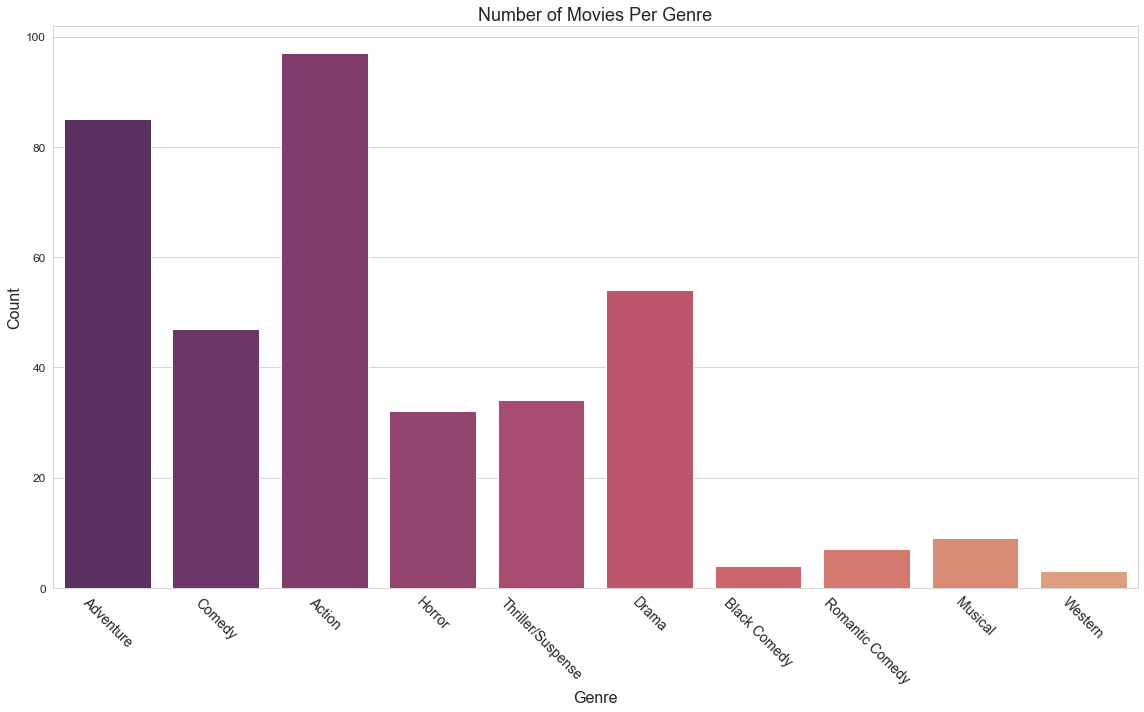

In [59]:
plt.figure(figsize=(16,10))
sns.countplot(x='Genre', data=All_data, palette='flare_r')
plt.title('Number of Movies Per Genre', fontsize=18)
plt.ylabel('Count', fontsize=16)
plt.xlabel('Genre', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(rotation=-45);
plt.tight_layout()

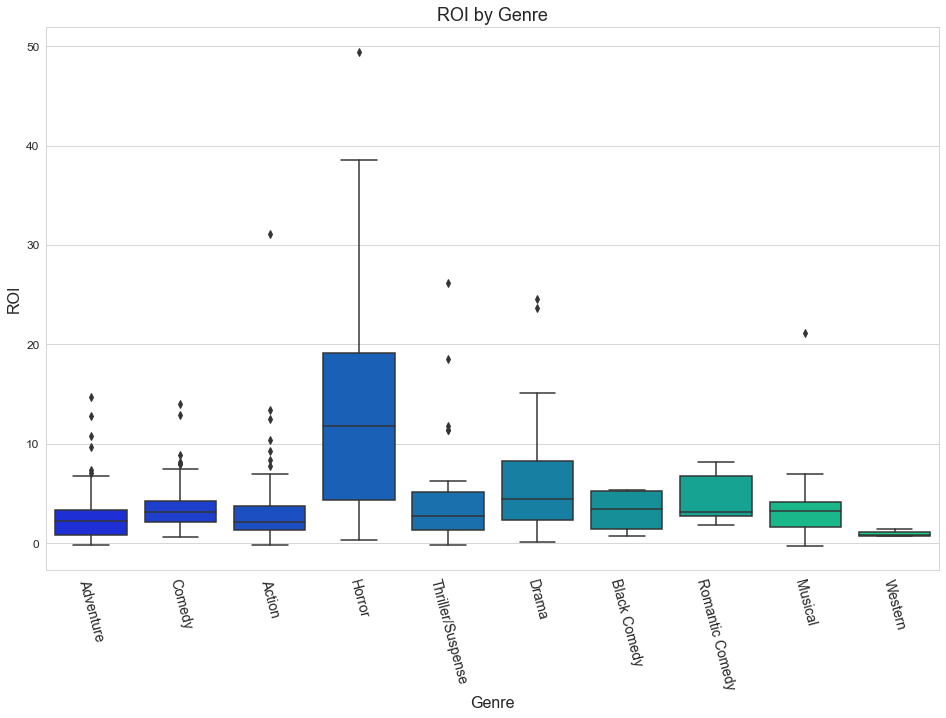

In [57]:

plt.figure(figsize=(16,10))
sns.set_style('whitegrid')
sns.boxplot(x='Genre', y='ROI', data = All_data, palette='winter')
plt.title('ROI by Genre', fontsize=18)
plt.ylabel('ROI', fontsize=16)
plt.xlabel('Genre', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(rotation=-75)
plt.ticklabel_format(style='plain', axis='y')


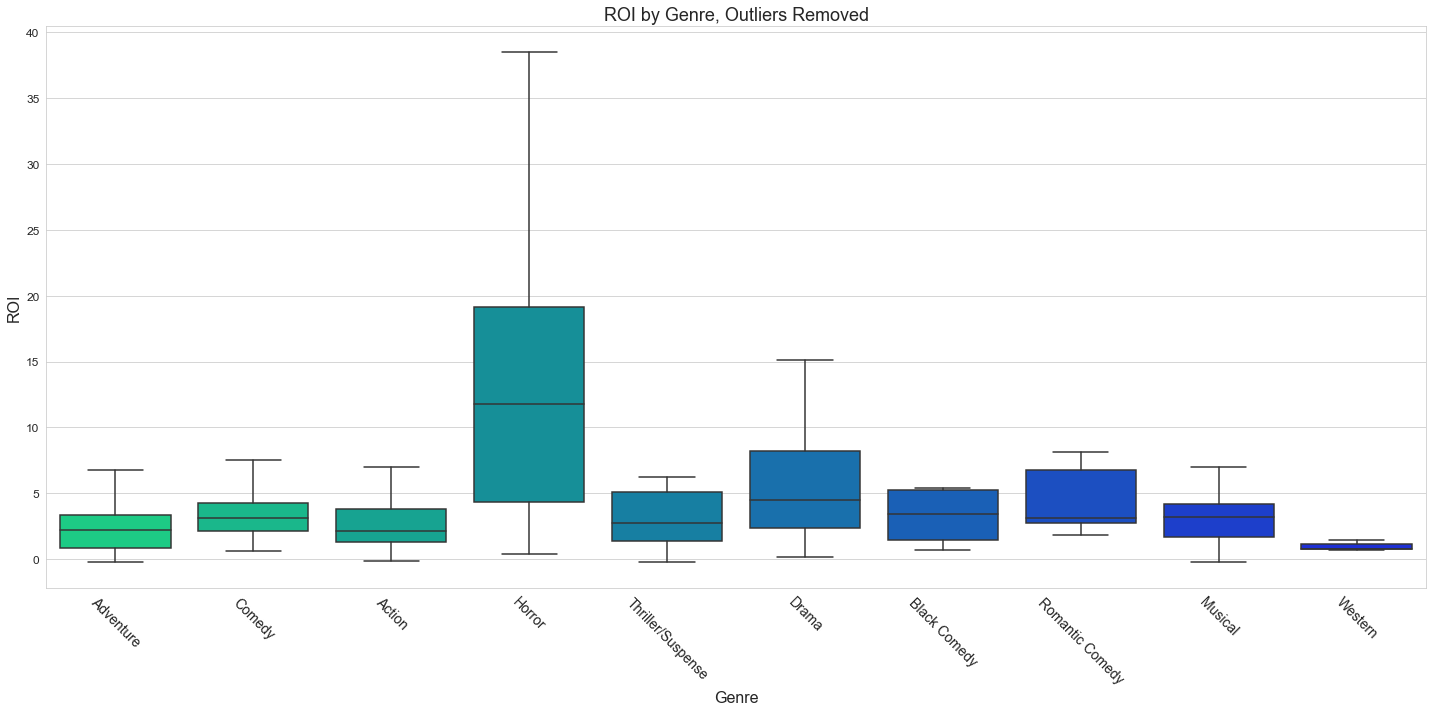

In [95]:
plt.figure(figsize=(20, 10))
sns.set_style('whitegrid')
sns.boxplot(x='Genre', y='ROI', data = All_data, palette='winter_r', showfliers = False)
plt.title('ROI by Genre, Outliers Removed', fontsize=18)
plt.ylabel('ROI', fontsize=16)
plt.xlabel('Genre', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(rotation=-45)
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()

In both the charts above Horror movies lead the way in ROI, even when outliers have been removed, along with having the largest IQR. Coming in second place on both boxplots is the Drama category.

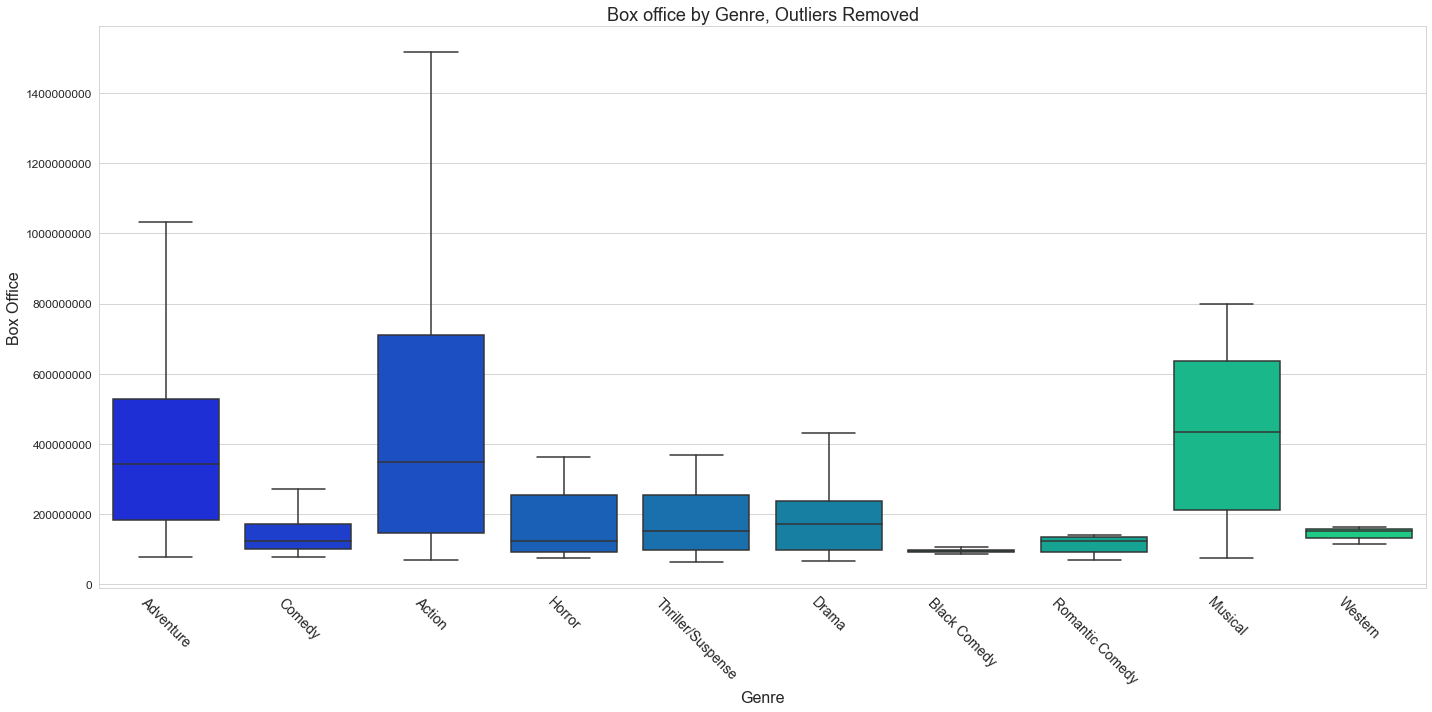

In [96]:
plt.figure(figsize=(20, 10))
sns.set_style('whitegrid')
sns.boxplot(x='Genre', y='WorldwideBox Office', data = All_data, palette='winter', showfliers = False)
plt.title('Box office by Genre, Outliers Removed', fontsize=18)
plt.ylabel('Box Office', fontsize=16)
plt.xlabel('Genre', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(rotation=-45)
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()

After looking at this boxplot, now based on box office as opposed to ROI, we see that 2 of the top 3 medians and maximum earnings are Action and Adventure which makes sense since they are among the most common genres. This visual though shows the potential box office earning power of musicals, especially when taking into consideration there is far less competition in that genre.

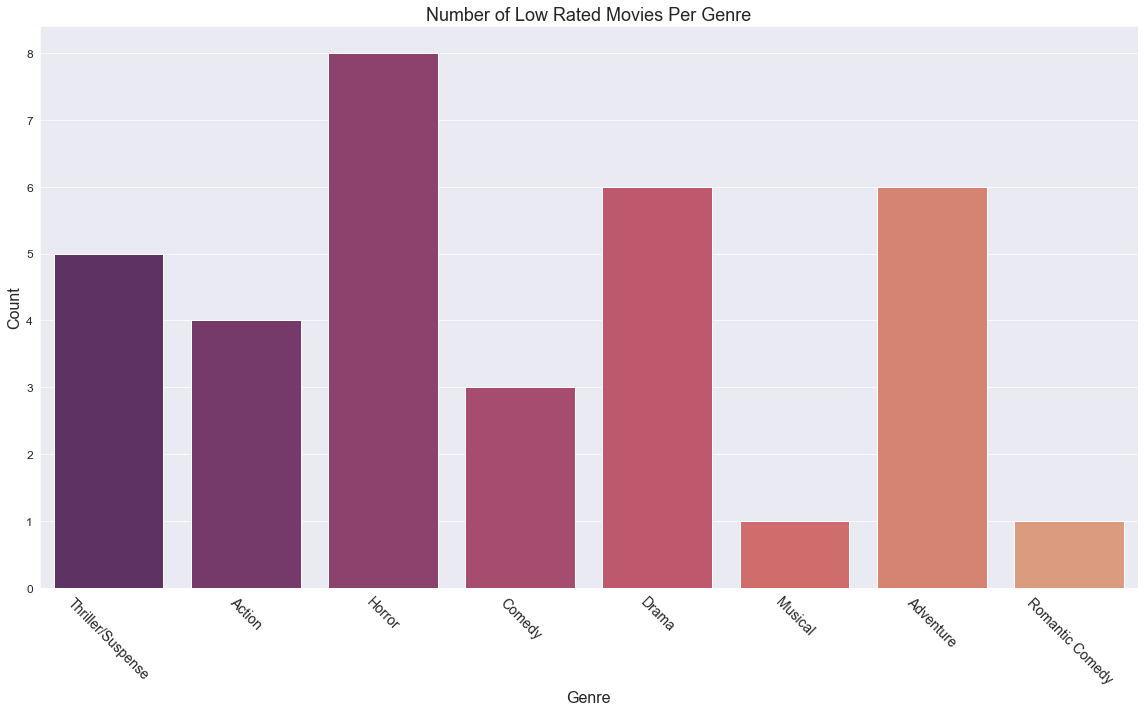

In [171]:
plt.figure(figsize=(16,10))
sns.countplot(x='Genre', data=Low_ratings, palette='flare_r')
plt.title('Number of Low Rated Movies Per Genre', fontsize=18)
plt.ylabel('Count', fontsize=16)
plt.xlabel('Genre', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(rotation=-45);
plt.tight_layout()


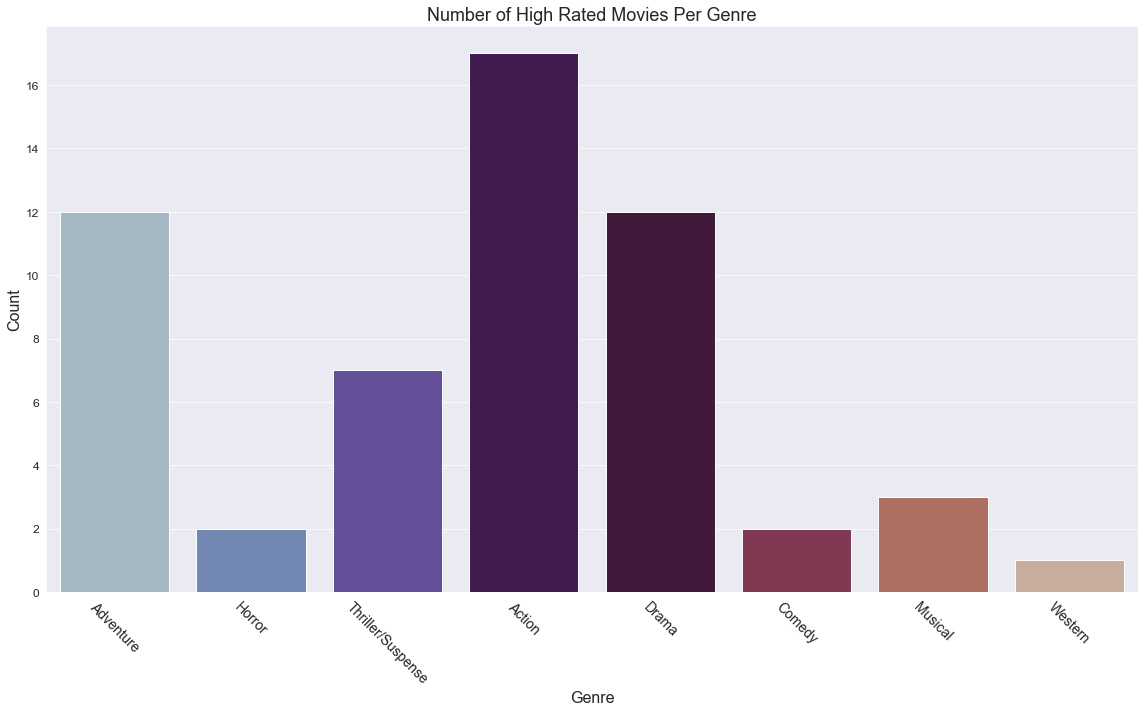

In [172]:
plt.figure(figsize=(16,10))
sns.countplot(x='Genre', data=High_ratings, palette='twilight')
plt.title('Number of High Rated Movies Per Genre', fontsize=18)
plt.ylabel('Count', fontsize=16)
plt.xlabel('Genre', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(rotation=-45);
plt.tight_layout()

So after looking at the visuals for genres with the highest and lowest ratings we see that for the most part there is a logical correlation of the genres with the most movies will have the highest bars on the charts. Action movies, which is the most popular genre and leads the highest rating category, but surprisingly is 4th on the low rating chart. The one exception really stands out is that horror movies led the way in terms having the most movies with lower than average ratings, yet when looking at the ROI by genre boxplot, it by far had the highest median and 4 out of 5 of the highest ROI's of the whole dataset. Granted, when looking at gross box office numbers as opposed to ROI the horror genre was not amongst the top earners, on top of the fact that it has largest IQR of all categories(interquartile range, which is the difference between the upper and lower quartile). Regardless, this still warrants a deeper look to see what makes this category have such a great ROI.

In [111]:
# Im going to create a subset Dataframe to take a closer look at this genres details.
Horrors = All_data.loc[All_data['Genre']=='Horror']
Horrors.sort_values(by='ROI', ascending=False).head(10)

,tconst,averagerating,numvotes,start_year,runtime_minutes,Released,Title,Genre,ProductionMethod,CreativeType,ProductionBudget,MaximumTheaters,WorldwideBox Office,ROI
355,tt5052448,7.70,400474,2017,104.00,"Feb 24, 2017",Get Out,Horror,Live Action,Contemporary Fiction,5000000,3143,252297405,49.46
330,tt3322940,5.40,122039,2014,99.00,"Oct 3, 2014",Annabelle,Horror,Live Action,Historical Fiction,6500000,3215,256862920,38.52
104,tt5495666,7.00,21,2016,80.00,"Jan 20, 2017",Split,Horror,Live Action,Contemporary Fiction,9000000,3373,278754594,29.97
8,tt1646127,6.40,971,2010,87.00,"Jul 22, 2016",Lights Out,Horror,Live Action,Contemporary Fiction,5000000,2835,148806510,28.76
462,tt1502407,6.60,88395,2018,106.00,"Oct 19, 2018",Halloween,Horror,Live Action,Contemporary Fiction,10000000,3990,255416089,24.54
360,tt5308322,6.50,87132,2017,96.00,"Oct 13, 2017",Happy Death Day,Horror,Live Action,Contemporary Fiction,5000000,3535,125010260,24.00
36,tt1204977,4.50,44054,2014,89.00,"Oct 24, 2014",Ouija,Horror,Live Action,Contemporary Fiction,5000000,2899,103300632,19.66
387,tt5140878,6.50,90402,2017,109.00,"Aug 11, 2017",Annabelle: Creation,Horror,Live Action,Contemporary Fiction,15000000,3565,305384865,19.36
421,tt1396484,7.40,359123,2017,135.00,"Sep 8, 2017",It,Horror,Live Action,Historical Fiction,35000000,4148,701083042,19.03
53,tt1605776,8.30,7,2010,90.00,"Sep 11, 2015",The Visit,Horror,Live Action,Contemporary Fiction,5000000,3148,98677816,18.74


In [103]:
# Pulling up the whole data set by ROI just for reference.
All_data.sort_values('ROI', ascending = False).head(10)

,tconst,averagerating,numvotes,start_year,runtime_minutes,Released,Title,Genre,ProductionMethod,CreativeType,ProductionBudget,MaximumTheaters,WorldwideBox Office,ROI
355,tt5052448,7.70,400474,2017,104.00,"Feb 24, 2017",Get Out,Horror,Live Action,Contemporary Fiction,5000000,3143,252297405,49.46
330,tt3322940,5.40,122039,2014,99.00,"Oct 3, 2014",Annabelle,Horror,Live Action,Historical Fiction,6500000,3215,256862920,38.52
347,tt5074352,8.50,123638,2016,161.00,"Dec 21, 2016",Dangal,Action,Live Action,Dramatization,9500000,338,305149461,31.12
104,tt5495666,7.00,21,2016,80.00,"Jan 20, 2017",Split,Horror,Live Action,Contemporary Fiction,9000000,3373,278754594,29.97
8,tt1646127,6.40,971,2010,87.00,"Jul 22, 2016",Lights Out,Horror,Live Action,Contemporary Fiction,5000000,2835,148806510,28.76
42,tt6772950,5.20,33621,2018,100.00,"Apr 13, 2018",Truth or Dare,Thriller/Suspense,Live Action,Contemporary Fiction,3500000,3068,95292744,26.23
119,tt2582846,7.70,315135,2014,126.00,"Jun 6, 2014",The Fault in Our Stars,Drama,Live Action,Contemporary Fiction,12000000,3340,307166834,24.60
462,tt1502407,6.60,88395,2018,106.00,"Oct 19, 2018",Halloween,Horror,Live Action,Contemporary Fiction,10000000,3990,255416089,24.54
360,tt5308322,6.50,87132,2017,96.00,"Oct 13, 2017",Happy Death Day,Horror,Live Action,Contemporary Fiction,5000000,3535,125010260,24.00
240,tt3832914,6.50,11716,2015,120.00,"Aug 28, 2015",War Room,Drama,Live Action,Contemporary Fiction,3000000,1945,73986904,23.66


In [104]:
Horrors.describe()

,averagerating,numvotes,start_year,ProductionBudget,MaximumTheaters,WorldwideBox Office,ROI
count,32.00,32.00,32.00,32.00,32.00,32.00,32.00
mean,6.09,75596.34,2015.84,20234375.00,3233.25,178605396.25,13.98
std,0.90,94201.85,2.34,20088106.08,472.55,129391830.17,11.64
min,4.50,7.00,2010.00,5000000.00,1656.00,74966854.00,0.36
25%,5.60,19952.50,2014.75,9000000.00,2978.50,92694822.00,4.32
50%,6.15,45576.50,2016.00,10000000.00,3159.00,124071999.50,11.77
75%,6.50,87447.75,2017.25,26250000.00,3570.00,253077076.00,19.11
max,8.30,400474.00,2019.00,97000000.00,4148.00,701083042.00,49.46


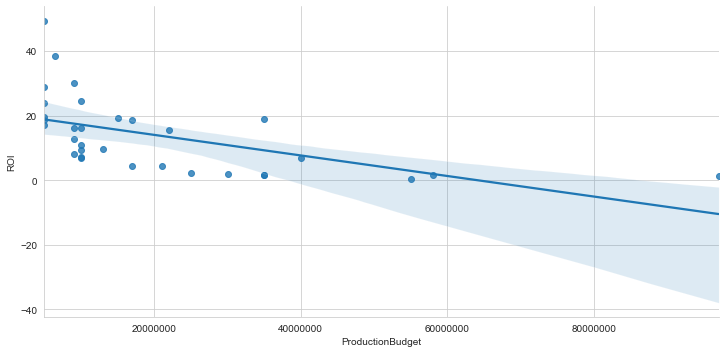

In [100]:
# Looking to see if a bigger budget means more ROI for Horror movies
sns.lmplot(x="ProductionBudget", y="ROI", data=Horrors, aspect = 2)
plt.ticklabel_format(style='plain', axis='x')

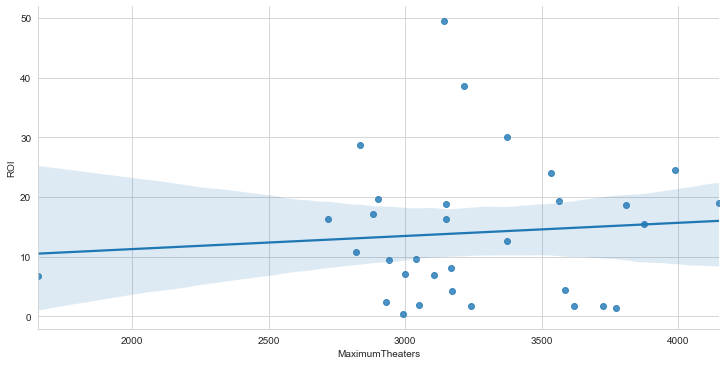

In [107]:
# Seeing if there is a relation between ROI and theaters for Horror movies
sns.lmplot(x="MaximumTheaters", y="ROI", data=Horrors, aspect = 2)
plt.ticklabel_format(style='plain', axis='x')

It is shown here that 4 of the top 5 movies with the best ROI are of the horror genre. And when looking at the mean budget of all movies in the data set we see it is over 80 million dollars as opposed to only 20 million for horror movies. And the regression line above shows that not only does a higher budget not help the ROI of Horror movies, it actually seems flat out detrimental. While the average ROI amongst all movies here is 4.72, the horror genre returns 13.98. All this is true even with Horror movies being released in slightly fewer than average theaters than the rest of the data set(approx 5%). This seems to be a lucrative genre of movies especially considering that poor ratings do not appear to have a negative effect on the returns.

***

Along with Horror movies, the Musical genre stood out as well. It also showed great box office returns on the boxplot despite being a relatively unpopular genre to make movies in. Once again I will make a subset dataframe on this category.


In [118]:
Musicals = All_data.loc[All_data['Genre']=='Musical']
Musicals.sort_values(by='WorldwideBox Office', ascending=False).head(10)

,tconst,averagerating,numvotes,start_year,runtime_minutes,Released,Title,Genre,ProductionMethod,CreativeType,ProductionBudget,MaximumTheaters,WorldwideBox Office,ROI
303,tt2771200,7.20,238325,2017,129.00,"Mar 17, 2017",Beauty and the Beast,Musical,Animation/Live Action,Fantasy,160000000,4210,1273109220,6.96
292,tt2380307,8.40,277194,2017,105.00,"Nov 22, 2017",Coco,Musical,Digital Animation,Kids Fiction,175000000,3987,797666425,3.56
317,tt3521164,7.60,224253,2016,107.00,"Nov 23, 2016",Moana,Musical,Digital Animation,Kids Fiction,150000000,3875,634965560,3.23
239,tt3783958,8.00,436070,2016,128.00,"Dec 9, 2016",La La Land,Musical,Live Action,Contemporary Fiction,20000000,3236,442896321,21.14
230,tt1485796,7.60,199663,2017,105.00,"Dec 20, 2017",The Greatest Showman,Musical,Live Action,Dramatization,84000000,3342,433748957,4.16
403,tt5028340,6.90,52103,2018,130.00,"Dec 19, 2018",Mary Poppins Returns,Musical,Animation/Live Action,Kids Fiction,130000000,4090,348901032,1.68
116,tt2201083,2.60,167,2012,<bound method NDFrame._add_numeric_operations....,"Dec 25, 2014",Into the Woods,Musical,Animation/Live Action,Fantasy,56200000,2833,212550576,2.78
422,tt1823664,5.30,31241,2014,118.00,"Dec 19, 2014",Annie,Musical,Live Action,Contemporary Fiction,65000000,3197,139829625,1.15
244,tt7886614,5.40,188,2018,90.00,"Dec 20, 2019",Cats,Musical,Animation/Live Action,Fantasy,100000000,3380,75486351,-0.25


In [119]:
Musicals.describe()

,averagerating,numvotes,start_year,ProductionBudget,MaximumTheaters,WorldwideBox Office,ROI
count,9.00,9.00,9.00,9.00,9.00,9.00,9.00
mean,6.56,162133.78,2016.11,104466666.67,3572.22,484350451.89,4.94
std,1.83,150437.53,1.96,52731489.64,478.12,375059550.50,6.41
min,2.60,167.00,2012.00,20000000.00,2833.00,75486351.00,-0.25
25%,5.40,31241.00,2016.00,65000000.00,3236.00,212550576.00,1.68
50%,7.20,199663.00,2017.00,100000000.00,3380.00,433748957.00,3.23
75%,7.60,238325.00,2017.00,150000000.00,3987.00,634965560.00,4.16
max,8.40,436070.00,2018.00,175000000.00,4210.00,1273109220.00,21.14


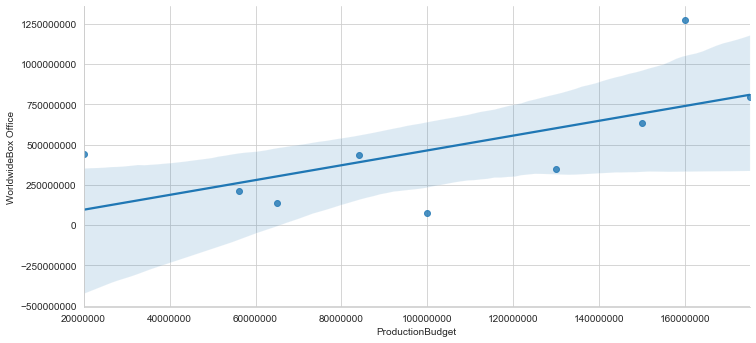

In [122]:
# Looking at budget vs box office for musicals
sns.lmplot(x="ProductionBudget", y="WorldwideBox Office", data=Musicals, aspect = 2)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')

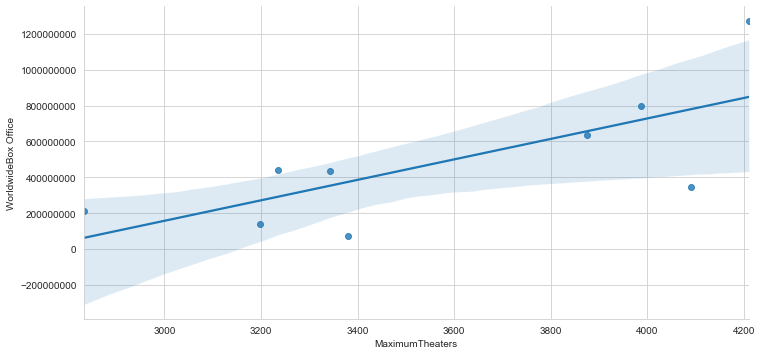

In [123]:
# Looking at theaters vs box office for musicals
sns.lmplot(x="MaximumTheaters", y="WorldwideBox Office", data=Musicals, aspect = 2)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')

***

Moving on with the analysis, I wanted to take a look at the information regarding the production budget of the dataset. There is an old adage of "You have to spend money to make money", and I believe that is true in the movie industry. I want to create a visual of a scatter plot with a regression line to see if there is an association of higher box offices with movies that have higher budgets. If this happens to be true then I will take a look at how this can used to our advantage.

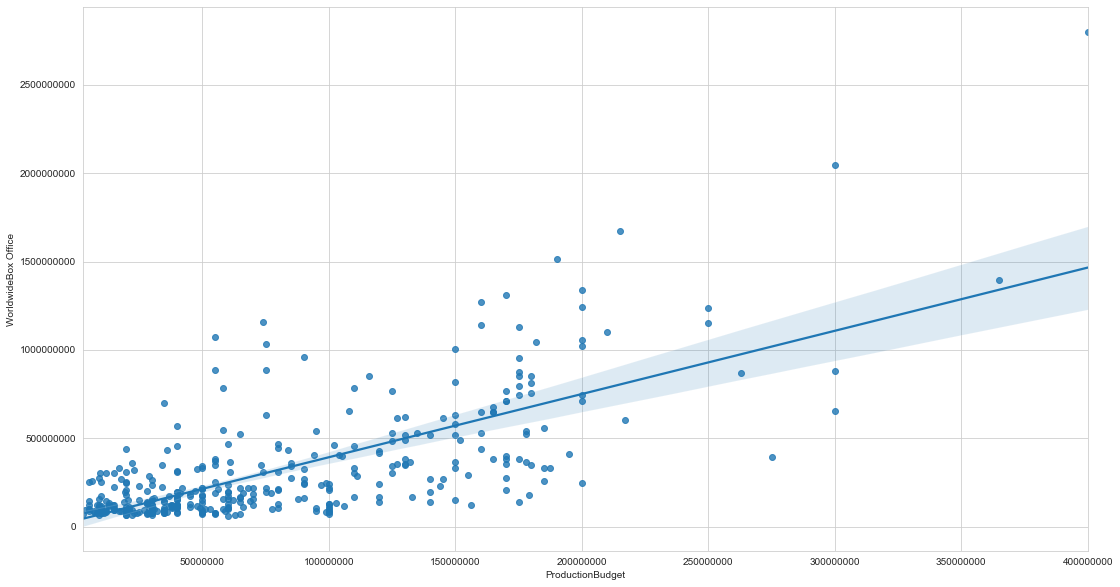

In [182]:
f, ax = plt.subplots(figsize=(18,10))
sns.regplot(x = "ProductionBudget", y = "WorldwideBox Office", data = All_data)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y');

This regression line does show a positive rise over run, meaning that the higher the budget the more likely we are to gross more at the box office. For a giant corporation such as Microsoft, this could definitely be used to their advantage. 

I'd like to use the same style chart once again, this time to look for a positive link between the number of theaters a movie is shown at along with box office sales. Because just like Microsoft is capable of having a higher budget to gross more earnings, they are also probably capable of distributing their films to more theaters than many other companies.

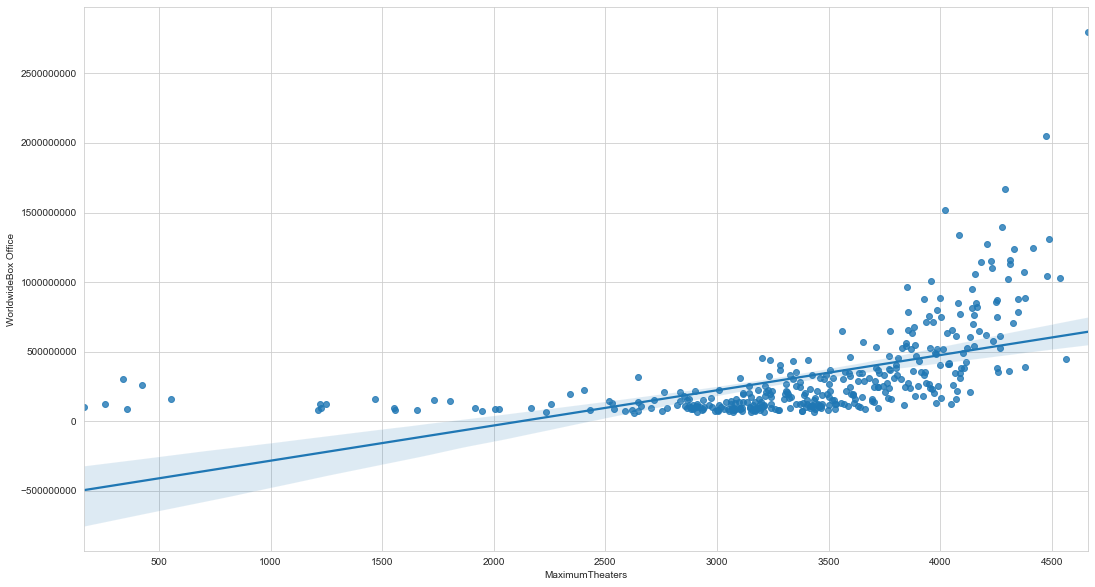

In [106]:
f, ax = plt.subplots(figsize=(18,10))
sns.regplot(x = "MaximumTheaters", y = "WorldwideBox Office", data = All_data)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y');

Once again the regression line shows a very positive correlation with the more theaters a movie is shown in the higher the earnings. The mean for 'Maximum theaters' is 3,400, and you can see the denisty in that area on the chart. Now the standard deviation of that category is 721. There seems to be a clear jump higher in Box Office earnings after the 4,000 theater mark.  

## Evaluation

***

After gathering some simple data and taking a pragmatic approach to analyze and interpret it, I believe the key to Microsoft's success lies within its ability to afford what the more common movie makers cannot. Microsoft can give themselves their best chance at premium earnings at the box office by investing more into the production budget and the number of theaters their movies are released in. 

In the beginning of the presentation I hypothesized that higher budgets and theater counts earn more at the box office and from what we learned that seems to be statistically true. I also asked if there was a particular genre that tended have better returns and whether ratings had any effect on those returns. What we say is that ratings are distributed pretty evenly, except for the Horror genre. When looking at the horror genre we see that it yielded fantastic returns despite the fact that they were far more likely to garner poor ratings. 
 
I chose a six year span of data, 2014-2019, to come to these interpretations. Due to the COVID pandemic I did not use the past 2 years of data fearing that too many out of ordinary factors could skew the information. I also did not want to reach too many years back because trends can change so often, especially when it comes to pop culture.
But I am still confident that if Microsoft follows these simple recommendations they give themselves the best chance to enter the movie industry and be financially successful. One caveat I would propose is to continue to monitor changing trends in the industry as many things have changed since the start of the pandemic such as popularity in streaming and a push for diversification.

***

## Conclusion

***

In conclusion I have the following recommendations for Microsofts entry into the movie industry:

### 1: 
An Action movie with a budget of over 200 million dollars and released in a minimum of 4,100 theaters.

The action genre is not only the most popular, but scored well in the rating department, having significantly more movies with high ratings than low. It also had the highest mean when it came to box office earnings and the second highest median according to the boxplot. This says that despite their being a lot of competition in this genre it still proves profitable with respectable ratings. The mean budget of all movies is 80 million and and if you look at the line plot the earnings mark noticeably higher above the 200 million budget mark, where there is also less competition. The 200 million mark is also approximately 2 standard deviations above the mean budget.

### 2:


A Musical with a budget of 100 million and released in a minimum of 3,500 theaters.

This genre does not appear to have a lot of competition, but does seem to be quite profitable.
The 100 million budget and 3,500 theaters is the mean for both those categories. The positive correlation on their line plots makes it appear that the winning formula here is having the cash to make and show these movies.

### 3:

A horror movie with a budget of approximately 20 million and released in approximately 3,200 theaters.

This particular type of movie can be a true cash cow for Microsoft. Not only is the average budget much less than average, we saw that spending more money does not mean a better return. As for the amount of theaters to show the movie in, that regression line shows some of the best returns were for movies released in approximately 3,200 theaters, which is the average. Add that to the fact that if the movie is poorly rated it does not seem to effect the ROI which at 13.98 is far higher than the rest of the dataset.

***

Although I have strong confidence in these conclusions, current trends should be continously monitored and analyzed as it becomes available. Once again this simple pragmatic approach to interpreting data will hopefully make Microsoft's entry into the movie industry a little easier and prosperous. 